# **Unlocking the Dynamics of Startup Funding in India: A Four-Year Overview (2018 - 2021)**

## Project Description:
This project aims to analyze the funding trends of Indian start-ups from 2018 to 2021. By examining the data on start-up funding across these years, the project will identify key patterns, investment behaviors, and emerging sectors within the Indian start-up ecosystem. The analysis will provide insights into the types of industries receiving the most investment, the most active investors, the average funding amounts, and the geographical distribution of funded start-ups. The findings will guide strategic decisions for entering the Indian start-up market.

**Hypotheses:**
- **Null Hypothesis (H0)**: The funds a company receives does not depend on the sector_Group the company invests in.
- **Alternative Hypothesis (H1)**: The funds a company receives depends on the sector_Group a company invests in.

## Business Questions
1. Does the funding a start-up receives depend on its sector group?
2. Which industries have received the most funding in each year, and how has this distribution changed over time?
3. What are the average funding amounts for different funding stages (e.g., Seed, Series A, Series B, etc.) each year?
4. How does funding for start-ups vary within the various geographical locations?
5. What is the relationship between the number of investors and the amount of funding received by startups?

## Importing all necessary modules

In [1]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the color palette
palette = {
    "Deep Blue": "#2E3B4E",
    "Teal": "#008080",
    "Light Gray": "#D3D3D3",
    "Dark Gray": "#4B4B4B",
    "Orange": "#FFA500",
    "Green": "#32CD32",
    "Light Blue": "#ADD8E6",
    "Soft Yellow": "#FFFACD"
}

warnings. filterwarnings('ignore')

## **Data Loading**

### loading from csv files

In [2]:
# Loading 2018 funds data
data_2018 = pd.read_csv('data\startup_funding2018.csv')

# Data preview
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [3]:
# Loading 2019 funds data
data_2019 = pd.read_csv('data\startup_funding2019.csv')

# Data preview
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### Loading from the database

In [5]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the .env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Creating a connection string
connection_string = f"DRIVER={{SQL Server}}; \
                    SERVER={server}; \
                    DATABASE={database}; \
                    UID={username}; \
                    PWD={password};"

# Connecting to the server
connection = pyodbc.connect(connection_string)

In [6]:
# Loading 2020 funds data
data_2020 = pd.read_sql_query(
    "SELECT * FROM LP1_startup_funding2020", connection)

# Saving the DataFrame to a CSV file
data_2020.to_csv('data/startup_funding2020.csv', index=False)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [7]:
# Loading 2021 funds data
data_2021 = pd.read_sql_query(
    "SELECT * FROM LP1_startup_funding2021", connection)

# Saving the DataFrame to a CSV file
data_2021.to_csv('data/startup_funding2021.csv', index=False)

# Data preview
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


## **Data information**

In [8]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [9]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [10]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [11]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [12]:
data_2018.shape, data_2019.shape, data_2020.shape, data_2021.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

## **Merging**

In [13]:
def standardize_column_names(df):
    # Creating a mapping based on common patterns found in the column names
    df.columns = [re.sub(r'(?i)^Company.*Name$', 'Company_Brand', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Amount.*$', 'Amount', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^What.*does$', 'What_it_does', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Industry$', 'Sector', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Round.*Series$', 'Stage', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Location$', 'HeadQuarter', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^About.*Company$', 'What_it_does', col)
                  for col in df.columns]
    return df


# Applying the function to standardize names
data_2018 = standardize_column_names(data_2018)
data_2019 = standardize_column_names(data_2019)
data_2020 = standardize_column_names(data_2020)
data_2021 = standardize_column_names(data_2021)

# Ensuring all DataFrames have the same set of columns
columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
           'Founders', 'Investor', 'Amount', 'Stage', 'Fund_Year',]

# Adding a new column 'Fund_Year' to each DataFrame
data_2018['Fund_Year'] = 2018
data_2019['Fund_Year'] = 2019
data_2020['Fund_Year'] = 2020
data_2021['Fund_Year'] = 2021

data_2018 = data_2018.reindex(columns=columns, fill_value=None)
data_2019 = data_2019.reindex(columns=columns)
data_2020 = data_2020.reindex(columns=columns)
data_2021 = data_2021.reindex(columns=columns)

# Merging all DataFrames
data = pd.concat([data_2018, data_2019, data_2020,
                 data_2021], ignore_index=True)

# Saving the DataFrame to a CSV file
data.to_csv('data/startup_funding_merged.csv', index=False)

# info of the combined DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2790 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   Fund_Year      2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


## **Data Cleaning**

### Duplicates

In [14]:
data.duplicated().sum()

23

In [15]:
data = data.drop_duplicates()

### Company_Brand, Founded, What_it_does & Investors

In [16]:
# Standardizing text formats and handling null values
data['Company_Brand'] = data['Company_Brand'].str.strip(
).str.title().fillna('Unknown')
data['What_it_does'] = data['What_it_does'].str.strip().str.lower()
data['Founders'] = data['Founders'].str.strip().str.title().fillna('Unknown')
data['Investor'] = data['Investor'].str.strip().str.title().fillna('Undisclosed')

# Handling null values and ensuring integer type for 'Founded'
data['Founded'] = data['Founded'].fillna(data['Founded'].median()).astype(int)

### Headquarter

In [17]:
# Function to simplify and standardize headquarters
def standardize_headquarters(hq):
    return "Unknown" if pd.isna(hq) else hq.split(',')[0].strip().title()

# Applying the function and checking for unique values
data['HeadQuarter'] = data['HeadQuarter'].apply(standardize_headquarters)
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'Unknown',
       'Telangana', 'Gurugram', 'Surat', 'Rajasthan', 'Tirunelveli',
       'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area', 'Bangaldesh',
       'London', 'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine',
       'Tumkur

In [18]:
# Irrelevant entries and city corrections
irrelevant_entries = {'Computer Games', 'Food & Beverages',
                      'Online Media', 'Information Technology & Services'}
city_corrections = {
    'Bangalore City': 'Bangalore', 'Bengaluru': 'Bangalore', 'Gurugram': 'Gurgaon',
    'Noida': 'Noida', 'Hyderebad': 'Hyderabad', 'Banglore': 'Bangalore',
    'Ahmadabad': 'Ahmedabad', 'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco',
    'San Francisco Bay Area': 'San Francisco', 'Telugana': 'Telangana'
}

# Clean and correct city names
data['HeadQuarter'] = data['HeadQuarter'].replace(r'\t#Ref!', '', regex=True).apply(
    lambda city: "Unknown" if city in irrelevant_entries else city_corrections.get(
        city, city)
)

# Verify the corrections
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Unknown', 'Telangana', 'Surat',
       'Rajasthan', 'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irvine', 'Tumkur', 'Newcastle Upon Tyne',
       'Shanghai', 'Jiaxing', 'Ludhiana', 'Dehradu

### Amount

In [19]:
# Define conversion rates for each year
conversion_rates = {2018: 0.01482, 2019: 0.01434, 2020: 0.01331, 2021: 0.01378}

# Optimized function to clean and convert Amount values
def clean_amount(amount, year):
    if pd.isnull(amount) or str(amount).strip() in ['-', '—', '--', 'Undisclosed', 'Undisclosed ']:
        return 0
    amount = str(amount).replace(',', '').replace('$', '').replace('₹', '')
    try:
        return float(amount) * conversion_rates.get(year, 1) if '₹' in amount else float(amount)
    except ValueError:
        return 0


# Apply the cleaning function to the Amount column
data['Amount'] = data.apply(lambda row: clean_amount(
    row['Amount'], row['Fund_Year']), axis=1)

### Stage

In [20]:
print(data['Stage'].isnull().sum())
data['Stage'].unique()

929


array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       None, 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [21]:
# Dictionary for mapping stages to standardized terms
stage_mapping = {
    r'(?i)^angel$': 'Pre-Seed',
    r'(?i)^seed (funding|fund|round|investment|a|\+)?$': 'Seed',
    r'(?i)^pre[-\s]?seed( round)?$': 'Pre-Seed',
    r'(?i)^pre[-\s]?series[-\s]?a1?$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?a$': 'Pre-Series A',
    r'(?i)^pre- series a$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?b$': 'Pre-Series B',
    r'(?i)^pre[-\s]?series[-\s]?c$': 'Pre-Series C',
    r'(?i)^early seed$': 'Pre-Seed',
    r'(?i)^series a[-\s]?[1+2]?$': 'Series A',
    r'(?i)^series b[-\s]?[+2-3]?$': 'Series B',
    r'(?i)^series c, d$': 'Series C',
    r'(?i)^series d1$': 'Series D',
    r'(?i)^series e2$': 'Series E',
    r'(?i)^series f[1-2]?$': 'Series F',
    r'(?i)^venture - series unknown$': 'Venture',
    r'(?i)^post series a$': 'Post-Series A',
    r'(?i)^non-equity assistance$': 'Other',
    r'(?i)^corporate round$': 'Other',
    r'(?i)^bridge( round)?$': 'Other',
    r'(?i)^private equity$': 'PE',
    r'(?i)^secondary market$': 'Other',
    r'(?i)^debt financing$': 'Debt',
    r'(?i)^post-ipo (debt|equity)$': 'Post-IPO',
    r'(?i)^undisclosed$': 'Other',
    r'(?i)^funding round$': 'Other',
    r'(?i)^fresh funding$': 'Other',
    r'(?i)^mid series$': 'Other',
    r'(?i)^edge$': 'Other',
    r'(?i)^grant$': 'Grant',
    r'(?i)^seies a$': 'Series A',
    r'(?i)^pre[-\s]?series$': 'Pre-Seed',
    r'(?i)^angel round$': 'Pre-Seed',
    r'(?i)^seed round & series a$': 'Seed',
    r'(?i)^series i$': 'Series I'
}

# Applying the mappings using regular expressions
for pattern, replacement in stage_mapping.items():
    data['Stage'] = data['Stage'].str.replace(pattern, replacement, regex=True)

# Additional replacements
data['Stage'] = data['Stage'].replace(r'(?i)seed\+', 'Seed', regex=True)

# Replacing numeric and erroneous entries with 'Unknown'
data['Stage'] = data['Stage'].replace(
    [r'\$\d+', r'https?://\S+'], 'Unknown', regex=True)

# Handling NaN values
data['Stage'].fillna('Unknown', inplace=True)

# Checking unique values after cleaning
data['Stage'].unique()

array(['Seed', 'Series A', 'Pre-Seed', 'Series B', 'PE', 'Venture',
       'Grant', 'Debt', 'Post-IPO', 'Series H', 'Series C', 'Series E',
       'Other', 'Unknown', 'Series D', 'Pre-Series A', 'Series G',
       'Post-Series A', 'Series F', 'Pre-Series C', 'Pre-Series B',
       'Series I'], dtype=object)

### Sector

In [22]:
# Filling null values and '—' in the 'Sector' column with 'Unknown'
data['Sector'] = data['Sector'].replace('—', 'Unknown').fillna('Unknown')

def refine_map_sector_additional(sector):
    if isinstance(sector, str):
        sector = sector.lower()
        if re.search(r'\bfintech|financial|finance|investment|bank|personal finance|insurance|microfinance|mobile payments|crypto|insurance technology\b', sector):
            return 'Finance & FinTech'
        elif re.search(r'\bhealth|healthcare|hospital|biotech|medical|life science|pharma|fitness|medtech|petcare|personal care|hygiene|cannabis|earth\b', sector):
            return 'Health & Life Sciences'
        elif re.search(r'\bfood|beverage|restaurant|catering|organic food|snack|foodtech|e-grocery|hauz khas\b', sector):
            return 'Food & Beverage'
        elif re.search(r'\btech|it|information technology|software|saas|cloud|internet|enterprise software|mobile|mobile apps|personalization|test and measurement|iot|scanning app|apps\b', sector):
            return 'Information Technology'
        elif re.search(r'\bdata|analytics|big data|machine learning|ai|artificial intelligence|predictive analytics|market research\b', sector):
            return 'Data & AI'
        elif re.search(r'\beducation|edtech|training|learning\b', sector):
            return 'Education'
        elif re.search(r'\blogistics|transport|delivery|shipping|automotive|mobility|electric mobility|autonomous vehicles|car service|sales and distribution|packaging|rail\b', sector):
            return 'Logistics & Transportation'
        elif re.search(r'\bretail|e-commerce|shopping|commerce|marketplace|d2c|b2b|consumer applications|social commerce|eyeglasses|furniture rental|e-market|consumer goods|eyewear\b', sector):
            return 'Retail & E-Commerce'
        elif re.search(r'\bmedia|entertainment|music|film|digital media|news|publishing|content|gaming|audio|computer games|video services|audio streaming\b', sector):
            return 'Media & Entertainment'
        elif re.search(r'\bmanufacturing|industrial|production|factory|hardware|semiconductors|materials science|engineering services|biomaterial|deeptech\b', sector):
            return 'Manufacturing & Industrial'
        elif re.search(r'\bconsulting|advisory|management consulting|professional services|legal services|entrepreneurship|mercato\b', sector):
            return 'Consulting & Professional Services'
        elif re.search(r'\benvironment|renewable|sustainability|green|environmental|solar\b', sector):
            return 'Environmental & Sustainability'
        elif re.search(r'\bsocial|community|networking|platform|public safety|trulymadly|betterhalf\b', sector):
            return 'Social & Community'
        elif re.search(r'\bmarketing|advertising|digital marketing|social media marketing|crm|loyalty programs|campaign management\b', sector):
            return 'Marketing & Advertising'
        elif re.search(r'\btravel|tourism|hospitality|aviation|event management|accommodation\b', sector):
            return 'Travel & Hospitality'
        elif re.search(r'\bconstruction|real estate|property|housing|interior design|customized home|co-living|proptech|interior & decor|rental\b', sector):
            return 'Real Estate & Construction'
        elif re.search(r'\benergy|oil|gas|power|utilities|solar\b', sector):
            return 'Energy & Utilities'
        elif re.search(r'\bfashion|lifestyle|apparel|clothing|jewellery|beauty|shoes|stylework\b', sector):
            return 'Fashion & Lifestyle'
        elif re.search(r'\bsports|fitness|wellness|recreation|gaming|esports\b', sector):
            return 'Sports & Recreation'
        elif re.search(r'\bagriculture|agtech|farming|agribusiness|cannabis\b', sector):
            return 'Agriculture'
        elif re.search(r'\bhr|human resources|staffing|recruiting\b', sector):
            return 'Human Resources'
        elif re.search(r'\bdefense|aerospace|military|space\b', sector):
            return 'Defense & Aerospace'
        else:
            return 'Other'
    else:
        return 'Other'


# Applying the further refined mapping function to the Sector column
data['Sector_Group'] = data['Sector'].apply(
    refine_map_sector_additional)

# Displaying the counts of each sector again
final_refined_sector_counts = data['Sector_Group'].value_counts()

final_refined_sector_counts

Sector_Group
Information Technology                587
Finance & FinTech                     442
Health & Life Sciences                303
Education                             276
Other                                 264
Retail & E-Commerce                   195
Data & AI                             175
Food & Beverage                       141
Logistics & Transportation            124
Media & Entertainment                 101
Real Estate & Construction             48
Fashion & Lifestyle                    40
Manufacturing & Industrial             28
Sports & Recreation                    21
Environmental & Sustainability         21
Social & Community                     17
Travel & Hospitality                   16
Marketing & Advertising                14
Consulting & Professional Services     12
Agriculture                            11
Human Resources                        11
Energy & Utilities                      5
Defense & Aerospace                     4
Name: count, dtype: i

In [23]:
# Saving the DataFrame to a CSV file
data.to_csv('data/cleaned_startup_funding.csv', index=False)

In [2]:
data = pd.read_csv('data/cleaned_startup_funding.csv')

## **Exploratory Data Analysis**

In [29]:
data.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Fund_Year,Sector_Group
count,2856,2856.000000,2856,2856,2856,2856,2856,2.856000e+03,2856,2856.000000,2856
unique,2107,NaN,117,873,2690,1979,1757,NaN,22,NaN,23
top,Unknown,NaN,Bangalore,FinTech,byju's is an educational technology company th...,Unknown,Undisclosed,NaN,Unknown,NaN,Information Technology
freq,89,NaN,922,172,5,544,637,NaN,935,NaN,587
mean,NaN,2016.317927,NaN,NaN,NaN,NaN,NaN,1.272267e+08,NaN,2020.017857,NaN
std,NaN,3.757599,NaN,NaN,NaN,NaN,NaN,3.138029e+09,NaN,1.087759,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,2018.000000,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,2.200000e+05,NaN,2020.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,2.000000e+06,NaN,2020.000000,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.020500e+07,NaN,2021.000000,NaN


### Company Diversity
The dataset contains `2856` entries with `2107` unique company brands, indicating a diverse range of startups.

### Funding Amount
- The mean funding amount is approximately `127 million`, but the standard deviation is very high (`~3.14 billion`), indicating a wide range in funding amounts.
- The funding amount distribution is highly skewed, with the 75th percentile at around `10.2 million`, but the maximum funding amount is a staggering `150 billion`.
- A large number of startups have received relatively low funding amounts, as seen from the 25th percentile value being `220,000`.

### Sector Concentration
- The top sector by frequency is `FinTech`, indicating a significant interest and investment in financial technology startups.
- The sector group `Information Technology` is the most frequent, appearing `587 times`, which shows a broad interest in IT-related startups.

### Geographical Concentration
- Bangalore, Mumbai, and other major cities are primary hubs for startups, with Bangalore leading by a significant margin.


### Total Funding by Year


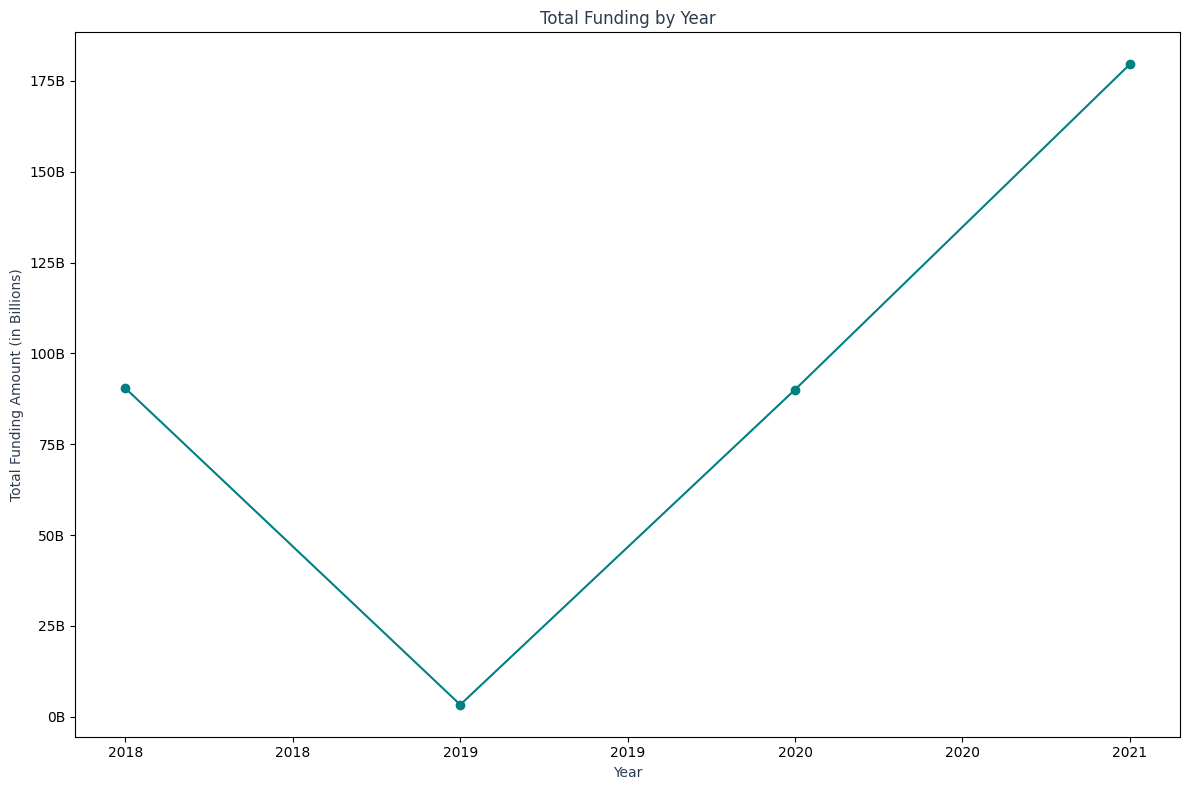

In [42]:
# Grouping data for total funding by year
funding_by_year = data.groupby('Fund_Year')['Amount'].sum()

# Converting amounts to billions
funding_by_year_billion = funding_by_year / 1e9

plt.figure(figsize=(12, 8))
plt.plot(funding_by_year_billion.index,
         funding_by_year_billion.values, marker='o', color='#008080')
plt.title('Total Funding by Year', color='#2E3B4E')
plt.xlabel('Year', color='#2E3B4E')
plt.ylabel('Total Funding Amount (in Billions)', color='#2E3B4E')
plt.grid(False)

# Formatting the y-axis to avoid scientific notation and display in billions
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'{y:,.0f}B'))
plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.tight_layout()
plt.show()

### Top sectors by funding

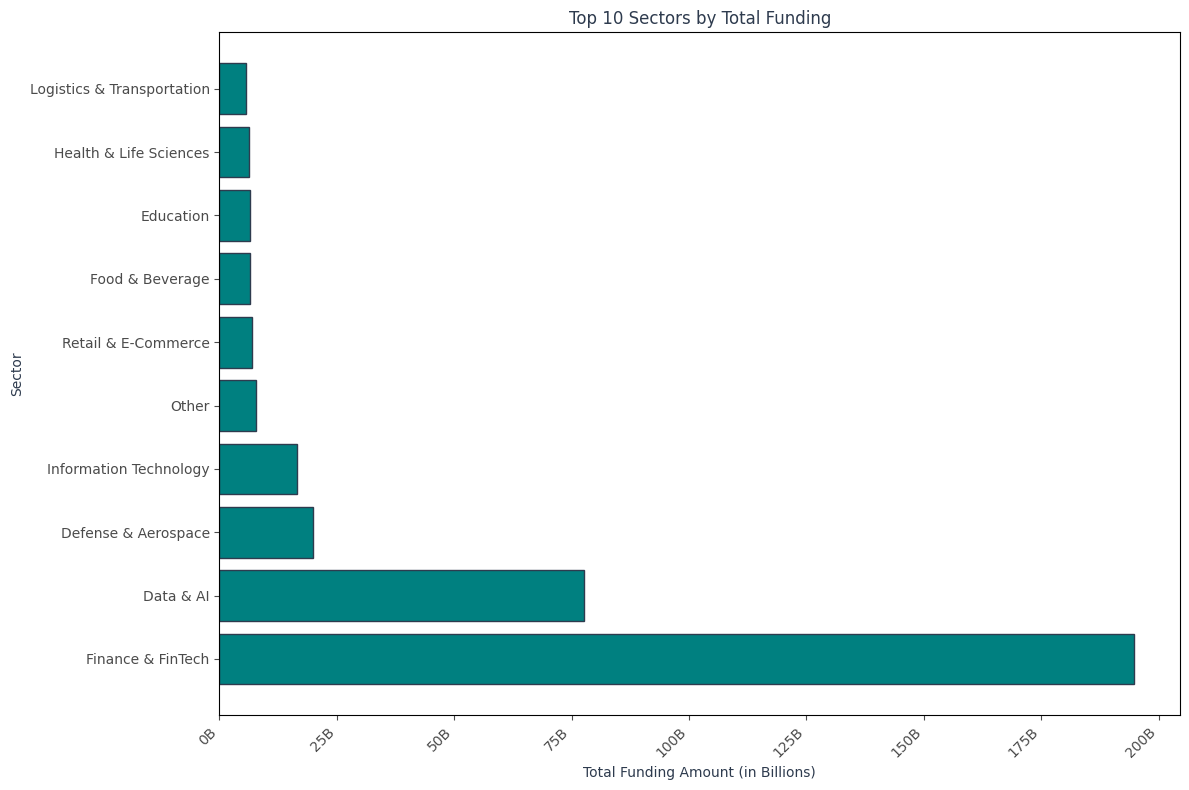

In [35]:
# Grouping data for top sectors
top_sectors = data.groupby('Sector_Group')[
    'Amount'].sum().sort_values(ascending=False).head(10)

# Converting amounts to billions
top_sectors_billion = top_sectors / 1e9

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(top_sectors_billion.index, top_sectors_billion.values,
               color='#008080', edgecolor='#2E3B4E')
ax.set_title('Top 10 Sectors by Total Funding', color='#2E3B4E')
ax.set_xlabel('Total Funding Amount (in Billions)', color='#2E3B4E')
ax.set_ylabel('Sector', color='#2E3B4E')
ax.tick_params(axis='x', colors='#4B4B4B')
ax.tick_params(axis='y', colors='#4B4B4B')

# Formatting the x-axis to avoid scientific notation and display in billions
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}B'))

ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top Locations by Total Funding

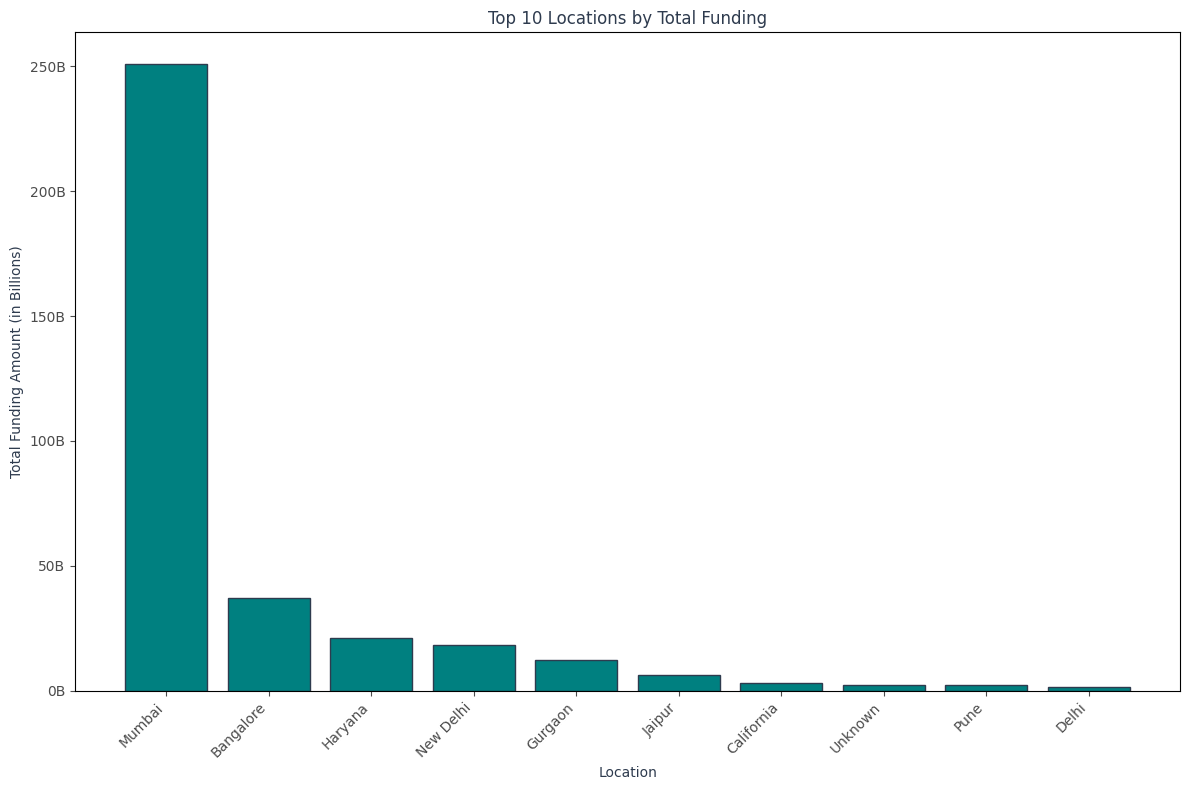

In [37]:
# Grouping data for top locations
top_locations = data.groupby('HeadQuarter')['Amount'].sum().sort_values(ascending=False).head(10)

# Converting amounts to billions
top_locations_billion = top_locations / 1e9

fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size for better readability
bars = ax.bar(top_locations_billion.index,
              top_locations_billion.values, color='#008080', edgecolor='#2E3B4E')
ax.set_title('Top 10 Locations by Total Funding', color='#2E3B4E')
ax.set_xlabel('Location', color='#2E3B4E')
ax.set_ylabel('Total Funding Amount (in Billions)', color='#2E3B4E')
ax.tick_params(axis='x', colors='#4B4B4B')
ax.tick_params(axis='y', colors='#4B4B4B')

# Formatting the y-axis to avoid scientific notation and display in billions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}B'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Hypothesis Testing**

• **Null Hypothesis (H0)**:
The funds a company receives does not depend on the sector_Group the company invests in.  
• **Alternative Hypothesis (H1)**:
The funds a company receives depends on the sector_Group a company invests in

In [3]:
from scipy.stats import f_oneway

# Grouping data by Sector_Group and get the funding amounts for each group
grouped_data = data.groupby('Sector_Group')['Amount'].apply(list)

# Performing ANOVA
anova_result = f_oneway(*grouped_data)

anova_result

F_onewayResult(statistic=0.8157790784387526, pvalue=0.708735588064246)

The p-value obtained from the `ANOVA test` is `0.709`, which is significantly higher than the conventional threshold of `0.05`. As a result, we `fail to reject the null hypothesis`.  

The analysis suggests that the amount of funding a start-up receives does not significantly depend on the Sector.

## **Business Questions**

### 1. Does the funding a start-up receives depend on its sector group?

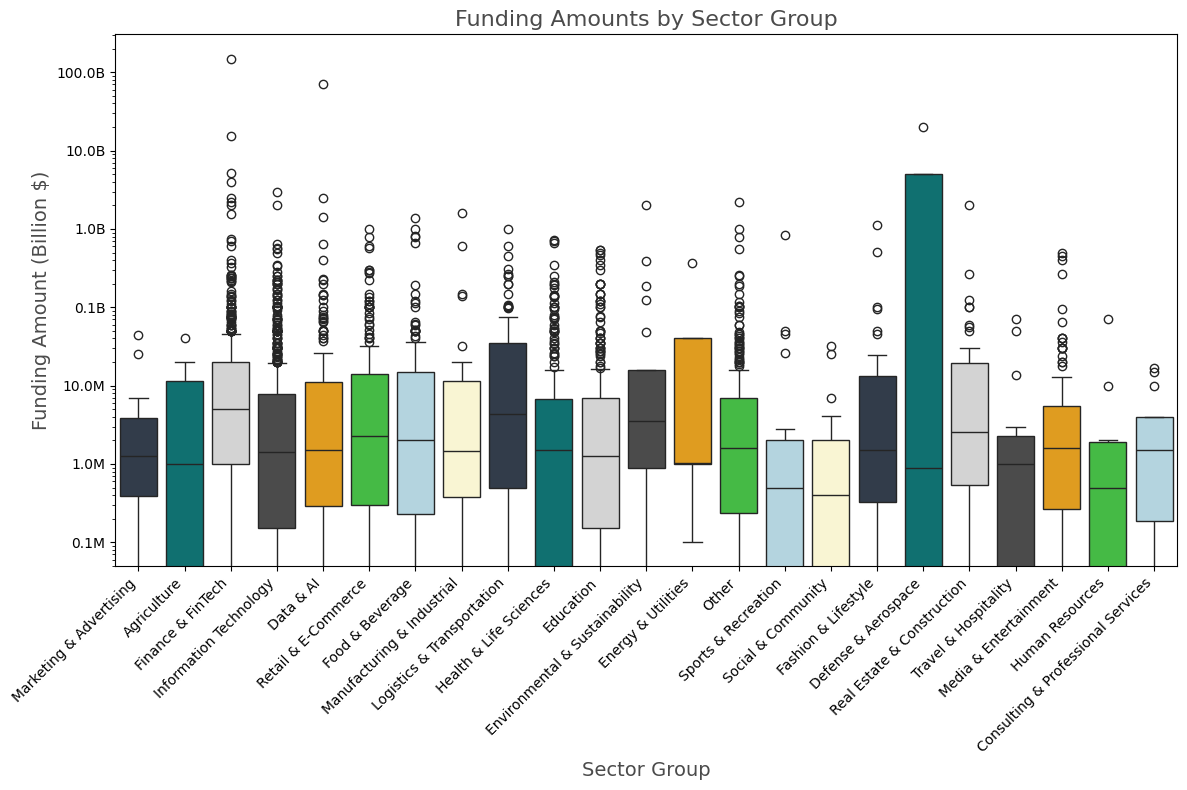

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Sector_Group',
    y='Amount',
    data=data,
    palette=[palette["Deep Blue"], palette["Teal"], palette["Light Gray"], palette["Dark Gray"],
             palette["Orange"], palette["Green"], palette["Light Blue"], palette["Soft Yellow"]]
)
plt.xticks(rotation=45, ha='right')
plt.title('Funding Amounts by Sector Group',
          fontsize=16, color=palette["Dark Gray"])
plt.xlabel('Sector Group', fontsize=14, color=palette["Dark Gray"])
plt.ylabel('Funding Amount (Billion $)',
           fontsize=14, color=palette["Dark Gray"])
plt.yscale('log')  
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}B'.format(
    y / 1e9) if y >= 1e8 else '{:.1f}M'.format(y / 1e6) for y in yticks])
[]
plt.tight_layout()
plt.show()

- **Variation in Funding**: Significant variation in funding amounts across different sector groups.
- **High Funding Sectors**:
  - **Finance & FinTech** and **Information Technology** receive higher funding, with amounts ranging from millions to billions.
  - These sectors have several outliers with exceptionally high funding.
- **Lower Funding Sectors**:
  - Sectors like **Agriculture** and **Marketing & Advertising** generally receive lower funding, mostly in the millions to tens of millions.
- **Presence of Outliers**: High funding sectors show more outliers, indicating a few startups receive much larger investments.

### 2. Which industries have received the most funding in each year, and how has this distribution changed over time? 

In [64]:
# Aggregate the total funding for each sector group by year
funding_by_sector_year = data.groupby(
    ['Fund_Year', 'Sector_Group'])['Amount'].sum().reset_index()

# Identify the sector with the highest funding in each year
max_funding_by_year = funding_by_sector_year.loc[funding_by_sector_year.groupby(
    'Fund_Year')['Amount'].idxmax()]

funding_by_sector_year['Amount'] = funding_by_sector_year['Amount'].apply(
    lambda x: '{:.2f}'.format(x))
max_funding_by_year['Amount'] = max_funding_by_year['Amount'].apply(
    lambda x: '{:.2f}'.format(x))

max_funding_by_year

,Fund_Year,Sector_Group,Amount
8,2018,Finance & FinTech,36898350000.00
24,2019,Education,736182700.00
40,2020,Data & AI,71253405800.00
67,2021,Finance & FinTech,155453655000.00


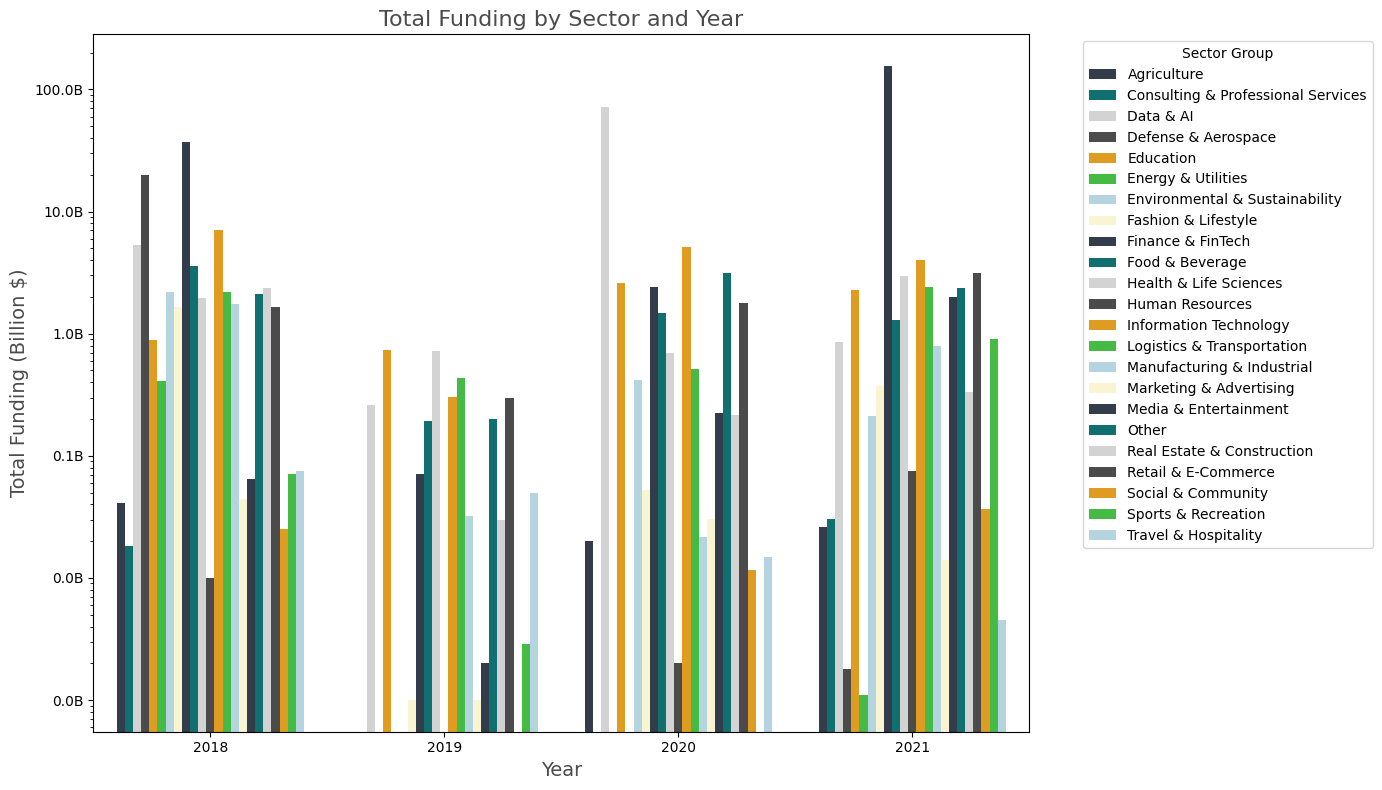

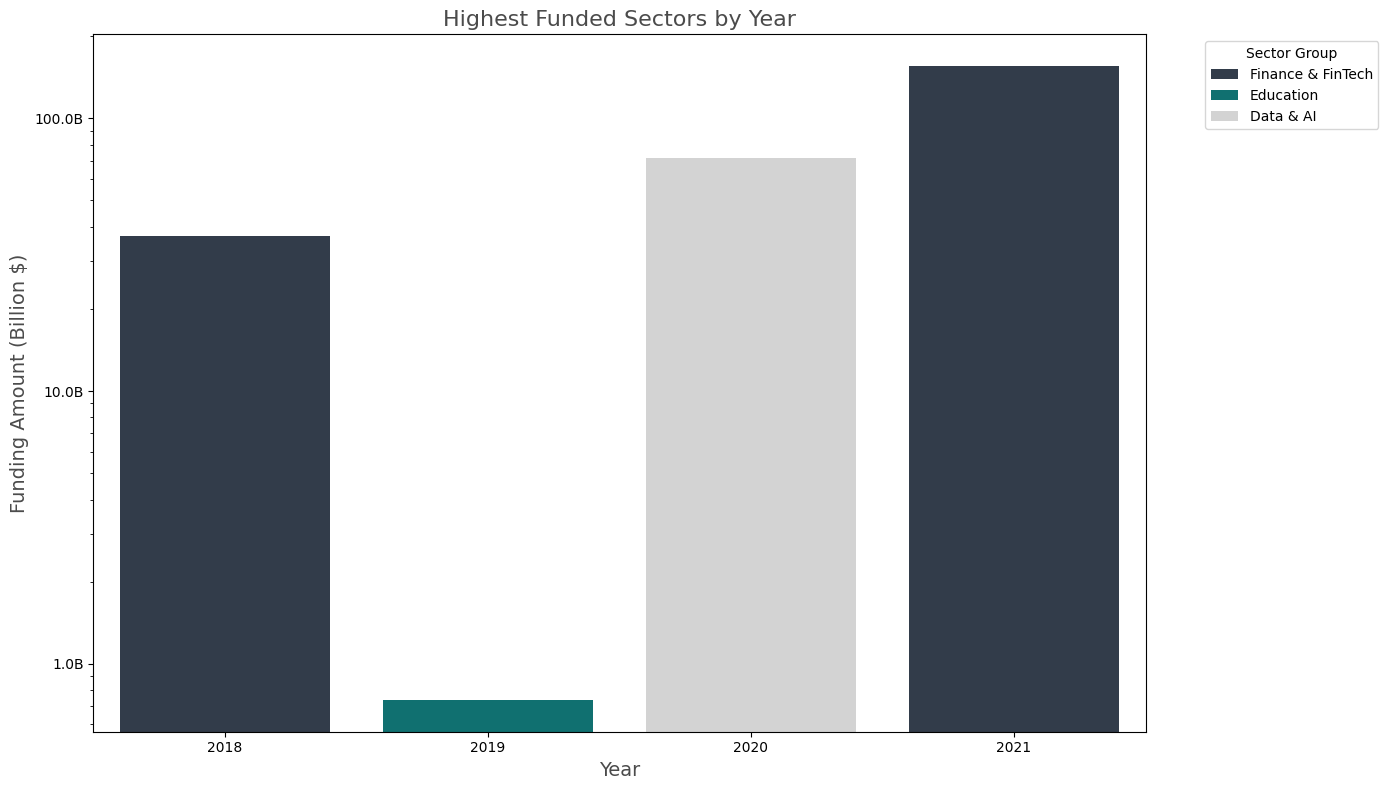

In [63]:
# Create a list of colors from the palette
colors = list(palette.values())

# Total Funding by Sector and Year with scale in billions
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Fund_Year', 
    y='Amount', 
    hue='Sector_Group', 
    data=funding_by_sector_year, 
    palette=colors
)
plt.title('Total Funding by Sector and Year', fontsize=16, color=palette["Dark Gray"])
plt.xlabel('Year', fontsize=14, color=palette["Dark Gray"])
plt.ylabel('Total Funding (Billion $)', fontsize=14, color=palette["Dark Gray"])
plt.yscale('log')  # Log scale for better visualization of funding differences

# Adjust the y-axis labels to show billions
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}B'.format(y / 1e9) for y in yticks])

plt.legend(title='Sector Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Highest Funded Sectors by Year with scale in billions
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Fund_Year', 
    y='Amount', 
    hue='Sector_Group', 
    data=max_funding_by_year, 
    palette=colors
)
plt.title('Highest Funded Sectors by Year', fontsize=16, color=palette["Dark Gray"])
plt.xlabel('Year', fontsize=14, color=palette["Dark Gray"])
plt.ylabel('Funding Amount (Billion $)', fontsize=14, color=palette["Dark Gray"])
plt.yscale('log')  # Log scale for better visualization

# Adjust the y-axis labels to show billions
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}B'.format(y / 1e9) for y in yticks])

plt.legend(title='Sector Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Key Observations 

1. **2018: Finance & FinTech Dominance**
   - **Observation**: Finance & FinTech received the highest funding (`~$36.90 billion`).
   - **Possible Reasons**:
     - **Innovation and Disruption**: The rise of fintech startups disrupting traditional banking and financial services, including payment solutions, digital banking, blockchain, and cryptocurrencies.
     - **Investor Confidence**: High investor confidence in the potential for fintech to transform financial services globally, leading to significant investment.

2. **2019: Education Sector Surge**
   - **Observation**: The Education sector saw a peak in funding (`~$0.74 billion`).
   - **Possible Reasons**:
     - **EdTech Boom**: Growing adoption of digital education platforms, online learning, and edtech solutions.
     - **Policy and Infrastructure**: Increased focus on education technology in policy frameworks and improving internet infrastructure in emerging markets, making education technology more accessible.

3. **2020: Data & AI Spike**
   - **Observation**: Data & AI became the highest funded sector (`~$71.25 billion`).
   - **Possible Reasons**:
     - **COVID-19 Pandemic**: Accelerated adoption of AI and data analytics for healthcare, supply chain management, and remote working solutions.
     - **Big Data Revolution**: Increasing need for data-driven decision-making and the rise of machine learning applications in various industries.
     - **Technological Advancements**: Significant advancements in AI technologies, making them more viable and attractive for large-scale investments.

4. **2021: Massive Finance & FinTech Growth**
   - **Observation**: Finance & FinTech surged again to dominate funding (`~$155.45 billion`).
   - **Possible Reasons**:
     - **Digital Transformation**: Continued digital transformation in the financial sector post-pandemic, with increased demand for contactless payments, digital wallets, and online banking services.
     - **Investment Trends**: Fintech startups attracting mega-rounds of funding from venture capital firms and financial institutions aiming to capitalize on the digital finance boom.
     - **Global Reach**: Expansion of fintech solutions into emerging markets, tapping into a broader customer base and unmet financial service needs.

#### Overall Funding Trends
- **Dynamic Sector Shifts**: The most funded sectors shifted over the years, reflecting evolving market trends and technological advancements.
- **Consistent Leaders**: Finance & FinTech and Data & AI sectors consistently attracted substantial funding, underscoring their critical role in the digital economy.
- **Emerging Opportunities**: Sectors like Education and Retail & E-Commerce showed significant funding at specific points, indicating emerging opportunities and investor interest in these areas.

#### Other Factors Influencing Funding
- **Market Needs**: The demand for innovative solutions in finance, education, and technology drove funding to these sectors.
- **Regulatory Changes**: Policies and regulations supporting innovation and digital transformation can spur investments in specific sectors.
- **Global Events**: Events like the COVID-19 pandemic significantly impacted funding trends, accelerating digital adoption and shifting investment priorities.


### 3.	What are the average funding amounts for different funding stages (e.g., Seed, Series A, Series B, etc.) each year?

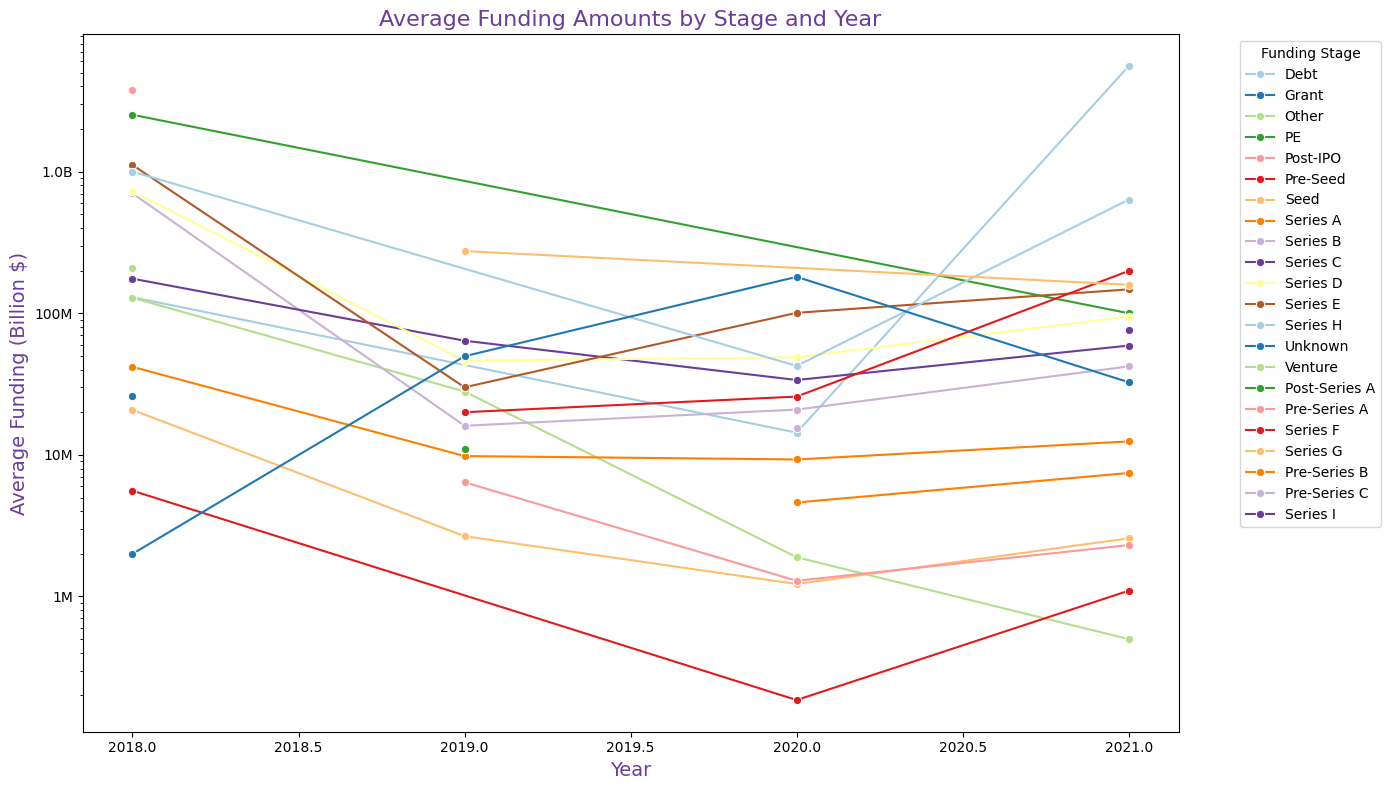

In [85]:
# Aggregating the average funding amount for each stage by year
average_funding_by_stage_year = data.groupby(['Fund_Year', 'Stage'])['Amount'].mean().reset_index()

# Rename the column for clarity
average_funding_by_stage_year.rename(columns={'Amount': 'Average_Funding'}, inplace=True)

# Generate a palette with the correct number of colors
num_stages = average_funding_by_stage_year['Stage'].nunique()
palette = sns.color_palette("Paired", num_stages)

# Create a line plot to show the average funding amounts for each funding stage over the years
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Fund_Year',
    y='Average_Funding',
    hue='Stage',
    data=average_funding_by_stage_year,
    marker='o',
    palette=palette
)
plt.title('Average Funding Amounts by Stage and Year',
          fontsize=16, color=palette[9])
plt.xlabel('Year', fontsize=14, color=palette[9])
plt.ylabel('Average Funding (Billion $)', fontsize=14, color=palette[9])
plt.yscale('log')  # Log scale for better visualization of funding differences

# Adjust the y-axis labels to show billions
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.1f}B'.format(
    y / 1e9) if y >= 1e9 else '{:.0f}M'.format(y / 1e6) for y in yticks])

plt.legend(title='Funding Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Debt and Post-IPO Stages:
- These stages show significantly higher average funding amounts compared to other stages.
- Possible reasons could be the larger capital requirements for scaling and expansion at these stages.

#### Seed and Pre-Seed Stages:
- These early-stage funding rounds have consistently lower average funding amounts.
- This reflects the typical smaller investments required to validate business models and develop initial products.

#### Series A to Series E:
- There is a noticeable increase in average funding amounts as startups progress from Series A to later stages.
- This trend indicates growing investor confidence and the need for larger investments to fuel growth and scaling operations.

#### Yearly Trends:
- In 2018 and 2021, the Post-IPO and Debt stages saw substantial average funding amounts, indicating major investments in mature companies.
- 2020 showed a spike in Series E funding, reflecting increased investments in growth-stage startups, possibly due to the accelerated digital transformation during the COVID-19 pandemic.

#### Summary
- **Early Stages**: Lower average funding amounts, reflecting smaller initial investments.
- **Growth Stages**: Progressive increase in funding, highlighting the need for more capital as startups scale.
- **Mature Stages**: High average funding amounts, driven by large investments in companies at Debt and Post-IPO stages.


### 4.	How does funding vary within the various geographical locations for start-ups?

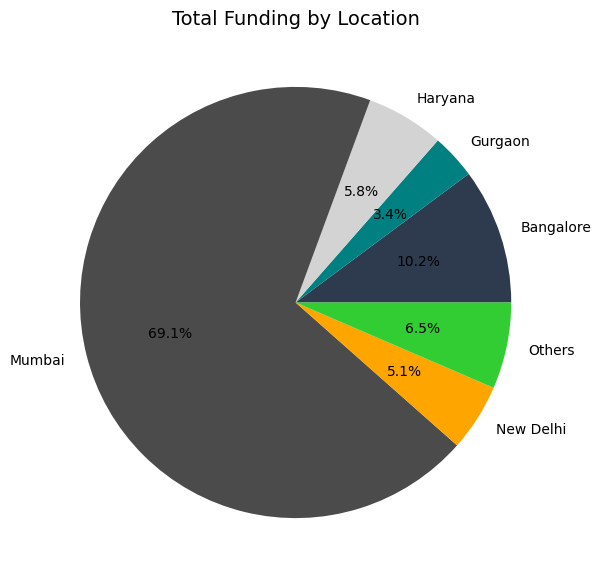

In [101]:
# Create a list of colors from the palette
colors = list(palette.values())

# Aggregate the total funding amount for each geographical location
funding_by_location = data.groupby('HeadQuarter')['Amount'].sum().reset_index()
funding_by_location.columns = ['HeadQuarter', 'Total_Funding']

# Calculate the total funding
total_funding = funding_by_location['Total_Funding'].sum()

# Calculate the percentage of total funding for each location
funding_by_location['Percentage'] = (
    funding_by_location['Total_Funding'] / total_funding) * 100

# Filter locations with at least 1.7% of the total funding
filtered_locations = funding_by_location[funding_by_location['Percentage'] >= 1.7]

# Sum the funding amounts for all other locations
others_funding = funding_by_location[funding_by_location['Percentage']
                                     < 1.7]['Total_Funding'].sum()
others_percentage = (others_funding / total_funding) * 100

# Add "Others" to the filtered locations
others_row = pd.DataFrame({'HeadQuarter': ['Others'], 'Total_Funding': [
                          others_funding], 'Percentage': [others_percentage]})
filtered_locations = pd.concat(
    [filtered_locations, others_row], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    filtered_locations['Total_Funding'],
    labels=filtered_locations['HeadQuarter'],
    autopct='%1.1f%%',
    colors=sns.color_palette(colors, len(filtered_locations))
)
plt.title('Total Funding by Location', fontsize=14)
plt.show()

**Dominance of Mumbai**:
   - Mumbai significantly leads in total funding, accounting for 69.1% of the total funding. 
   - This dominance indicates that Mumbai is a major hub for startup investments, likely due to its strong financial infrastructure and a large number of established businesses.

**Concentration of Funding**:
   - The majority of the funding is highly concentrated in a few key locations, with Mumbai, Bangalore, and Haryana making up a substantial portion of the total investments.
   - This concentration suggests that these cities offer favorable conditions for startups, such as better access to investors, talent, and infrastructure.


### 5. What is the relationship between the number of investors and the amount of funding received by startups?

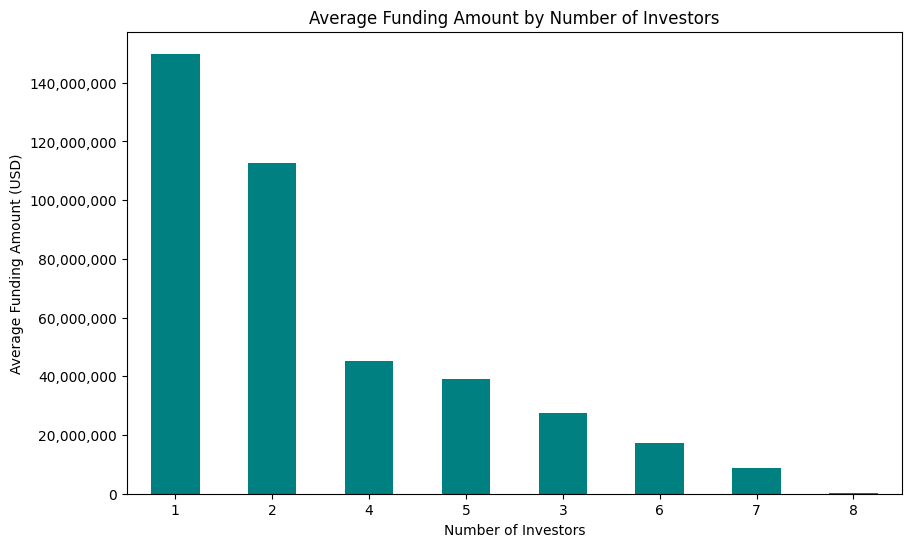

In [4]:
data['Investor_Count'] = data['Investor'].apply(lambda x: len(x.split(',')))

funding_by_investor_count = data.groupby(
    'Investor_Count')['Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
funding_by_investor_count.plot(kind='bar', color='teal')
plt.title('Average Funding Amount by Number of Investors')
plt.xlabel('Number of Investors')
plt.ylabel('Average Funding Amount (USD)')
plt.xticks(rotation=0)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.grid(False)
plt.show()

1. **Higher Funding with Fewer Investors**: Startups with only one investor receive the highest average funding, suggesting substantial individual investments.
2. **Decline in Funding with More Investors**: As the number of investors increases, the average funding decreases, indicating that more investors typically contribute smaller amounts per investor.
3. **Strategic Partnerships**: Significant funding for startups with two investors may indicate strategic partnerships or joint investments.
4. **Data Limitations**: The sharp decrease in average funding for startups with more than six investors could be due to limited data points or unique investment scenarios in these cases.
